In [1]:
RANDOM_STATE = 44
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
from matplotlib import pyplot as plt
from sklearn.model_selection import cross_val_score
from collections import Counter

In [4]:
import os
from pathlib import Path
print("Working directory before change:", os.getcwd())
project_root = Path(r'C:\Users\nolan\OneDrive\Desktop\School\CS\Supervised-Learning-Final-Project')
if project_root.exists():
    os.chdir(project_root)
    print("Changed working directory to:", os.getcwd())
else:
    raise FileNotFoundError(f"Project root not found: {project_root}")
# Show top-level contents to confirm working directory
print('Top-level files/folders:', os.listdir('.'))

Working directory before change: C:\Users\nolan\OneDrive\Desktop\School\CS\Supervised-Learning-Final-Project
Changed working directory to: C:\Users\nolan\OneDrive\Desktop\School\CS\Supervised-Learning-Final-Project
Top-level files/folders: ['.git', '.gitignore', 'data', 'figures', 'notebooks', 'requirements.txt']


In [5]:
# Create figures directory if it doesn't exist
figures_dir = Path('figures')
figures_dir.mkdir(exist_ok=True)
print(f"Figures will be saved to: {figures_dir.absolute()}")

Figures will be saved to: C:\Users\nolan\OneDrive\Desktop\School\CS\Supervised-Learning-Final-Project\figures


In [6]:
df = pd.read_csv('data/creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [7]:
print('Dataset Info')
print('-'*50)
df.info()

Dataset Info
--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-nul

In [8]:
print("\n" + "-"*50)
print("Missing Values:")
print(df.isnull().sum())


--------------------------------------------------
Missing Values:
Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,1.168375e-15,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,3.416908e-16,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-1.379537e-15,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,2.074095e-15,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,9.604066e-16,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,1.487313e-15,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-5.556467e-16,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.0,1.213481e-16,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,-2.406331e-15,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


In [10]:
class_counts = df['Class'].value_counts()
class_pcts = df['Class'].value_counts(normalize=True) * 100

print("Class Distribution:")
print(f"  Class 0 (Legitimate): {class_counts[0]:,} ({class_pcts[0]:.2f}%)")
print(f"  Class 1 (Fraud):      {class_counts[1]:,} ({class_pcts[1]:.4f}%)")
print(f"\nRatio: {class_counts[0] / class_counts[1]:.1f}:1")

Class Distribution:
  Class 0 (Legitimate): 284,315 (99.83%)
  Class 1 (Fraud):      492 (0.1727%)

Ratio: 577.9:1


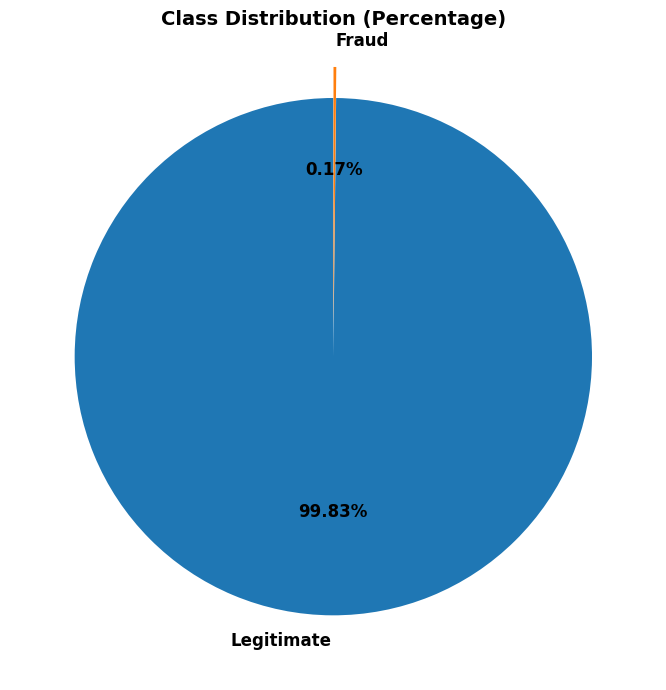

Saved: class_distribution.png


In [11]:
# Visualize class distribution (pie chart only)
# Define labels and colors
class_labels = ['Legitimate', 'Fraud']
colors = ['#1f77b4', '#ff7f0e']

# Use explode to emphasize the small fraud slice
explode = (0, 0.12)

# Create a single pie chart
fig, ax = plt.subplots(figsize=(7, 7))

# Ensure class order is consistent (0 -> Legitimate, 1 -> Fraud)
counts = class_counts.sort_index().values

ax.pie(counts, labels=class_labels, autopct='%1.2f%%',
       colors=colors, startangle=90, explode=explode,
       textprops={'fontsize': 12, 'fontweight': 'bold'})
ax.set_title('Class Distribution (Percentage)', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.savefig(figures_dir / 'class_distribution.png', dpi=300, bbox_inches='tight')
plt.show()
print("Saved: class_distribution.png")

## 4. Feature Analysis

The dataset contains PCA-transformed features (V1-V28) for privacy, plus Time and Amount.


In [12]:
# Identify feature types
pca_features = [col for col in df.columns if col.startswith('V')]
other_features = ['Time', 'Amount']

print(f"PCA Features: {len(pca_features)} features (V1-V28)")
print(f"Other Features: {other_features}")
print(f"Target: Class")
# Analyze Time feature
print("\nTime Feature Analysis (seconds since first transaction):")
print(f"  Min: {df['Time'].min()}")
print(f"  Max: {df['Time'].max()}")
print(f"  Hours of data: {df['Time'].max() / 3600:.1f} hours")
print(f"  Days of data: {df['Time'].max() / (3600 * 24):.1f} days")
# Analyze Amount feature
print("\nAmount Feature Analysis:")
print(df['Amount'].describe())

print("\nAmount by Class:")
for class_val in [0, 1]:
    class_name = 'Legitimate' if class_val == 0 else 'Fraud'
    class_data = df[df['Class'] == class_val]['Amount']
    print(f"\n  {class_name}:")
    print(f"    Mean: ${class_data.mean():.2f}")
    print(f"    Median: ${class_data.median():.2f}")
    print(f"    Std: ${class_data.std():.2f}")
    print(f"    Max: ${class_data.max():.2f}")

PCA Features: 28 features (V1-V28)
Other Features: ['Time', 'Amount']
Target: Class

Time Feature Analysis (seconds since first transaction):
  Min: 0.0
  Max: 172792.0
  Hours of data: 48.0 hours
  Days of data: 2.0 days

Amount Feature Analysis:
count    284807.000000
mean         88.349619
std         250.120109
min           0.000000
25%           5.600000
50%          22.000000
75%          77.165000
max       25691.160000
Name: Amount, dtype: float64

Amount by Class:

  Legitimate:
    Mean: $88.29
    Median: $22.00
    Std: $250.11
    Max: $25691.16

  Fraud:
    Mean: $122.21
    Median: $9.25
    Std: $256.68
    Max: $2125.87


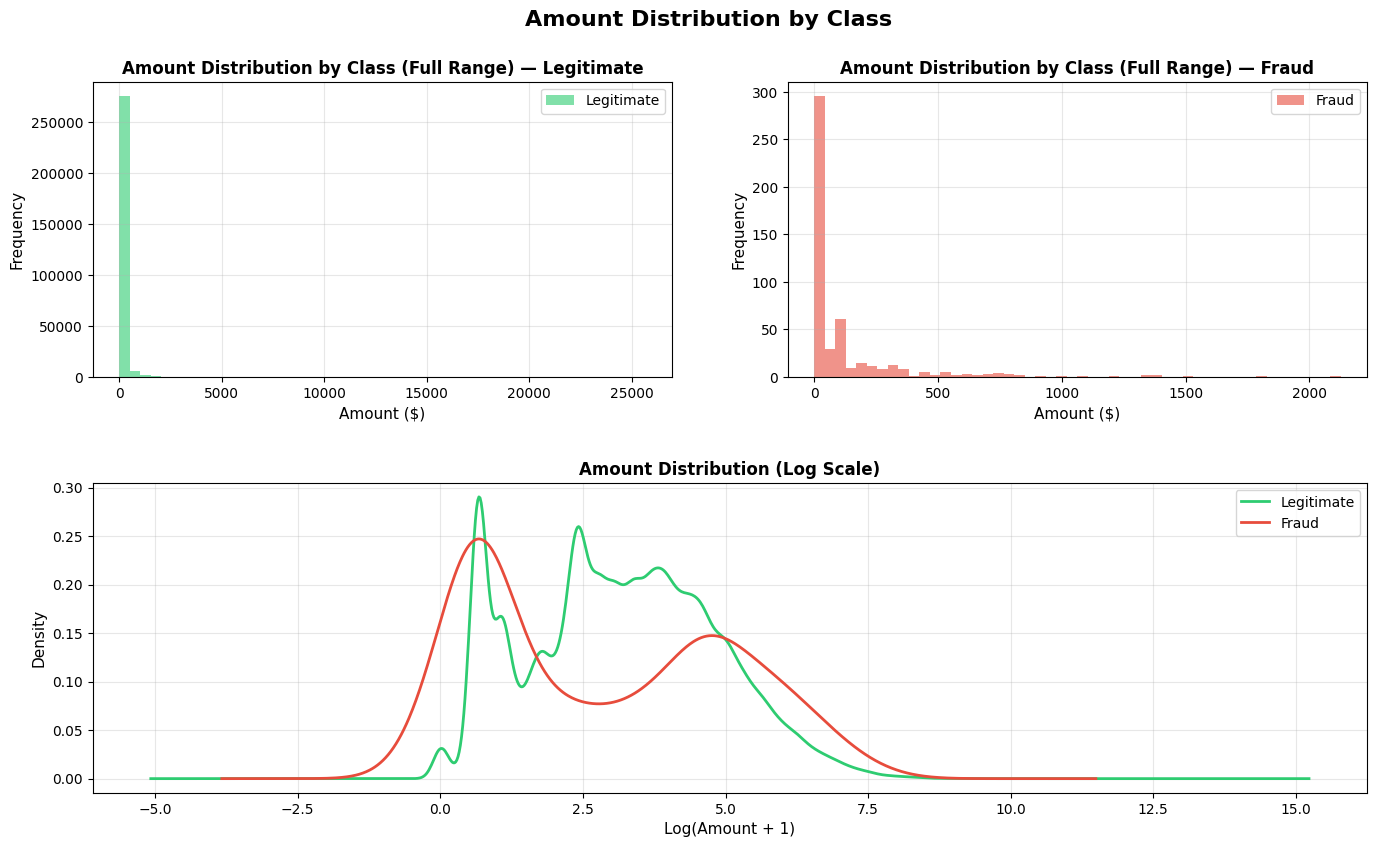

Saved: amount_distribution.png


In [13]:
# Amount distribution by class (two on top, one below)
from matplotlib.gridspec import GridSpec

fig = plt.figure(figsize=(14, 9))
# GridSpec: 2 rows, 2 columns -> top two (0,0) & (0,1); bottom spans both columns (1,:)
gs = GridSpec(2, 2, figure=fig, height_ratios=[1, 1.05], hspace=0.35)

ax0 = fig.add_subplot(gs[0, 0])  # Left histogram (Legitimate)
ax1 = fig.add_subplot(gs[0, 1])  # Right histogram (Fraud)
ax2 = fig.add_subplot(gs[1, :])  # Bottom KDE spanning both columns (Log scale)

# Histogram: Legitimate
ax0.hist(df[df['Class'] == 0]['Amount'], bins=50, alpha=0.6, label='Legitimate', color='#2ecc71')
ax0.set_xlabel('Amount ($)', fontsize=11)
ax0.set_ylabel('Frequency', fontsize=11)
ax0.set_title('Amount Distribution by Class (Full Range) — Legitimate', fontsize=12, fontweight='bold')
ax0.legend()
ax0.grid(alpha=0.3)

# Histogram: Fraud
ax1.hist(df[df['Class'] == 1]['Amount'], bins=50, alpha=0.6, label='Fraud', color='#e74c3c')
ax1.set_xlabel('Amount ($)', fontsize=11)
ax1.set_ylabel('Frequency', fontsize=11)
ax1.set_title('Amount Distribution by Class (Full Range) — Fraud', fontsize=12, fontweight='bold')
ax1.legend()
ax1.grid(alpha=0.3)

# KDE plot (log scale for better visibility) — bottom spanning both columns
(df[df['Class'] == 0]['Amount'].apply(lambda x: np.log1p(x))).plot(kind='kde', ax=ax2, label='Legitimate', color='#2ecc71', linewidth=2)
(df[df['Class'] == 1]['Amount'].apply(lambda x: np.log1p(x))).plot(kind='kde', ax=ax2, label='Fraud', color='#e74c3c', linewidth=2)
ax2.set_xlabel('Log(Amount + 1)', fontsize=11)
ax2.set_ylabel('Density', fontsize=11)
ax2.set_title('Amount Distribution (Log Scale)', fontsize=12, fontweight='bold')
ax2.legend()
ax2.grid(alpha=0.3)

# Add a main title (suptitle) and use subplots_adjust instead of tight_layout to avoid the compatibility warning
fig.suptitle('Amount Distribution by Class', fontsize=16, fontweight='bold')
fig.subplots_adjust(top=0.90, hspace=0.35, left=0.06, right=0.97)

plt.savefig(figures_dir / 'amount_distribution.png', dpi=300, bbox_inches='tight')
plt.show()
print("Saved: amount_distribution.png")

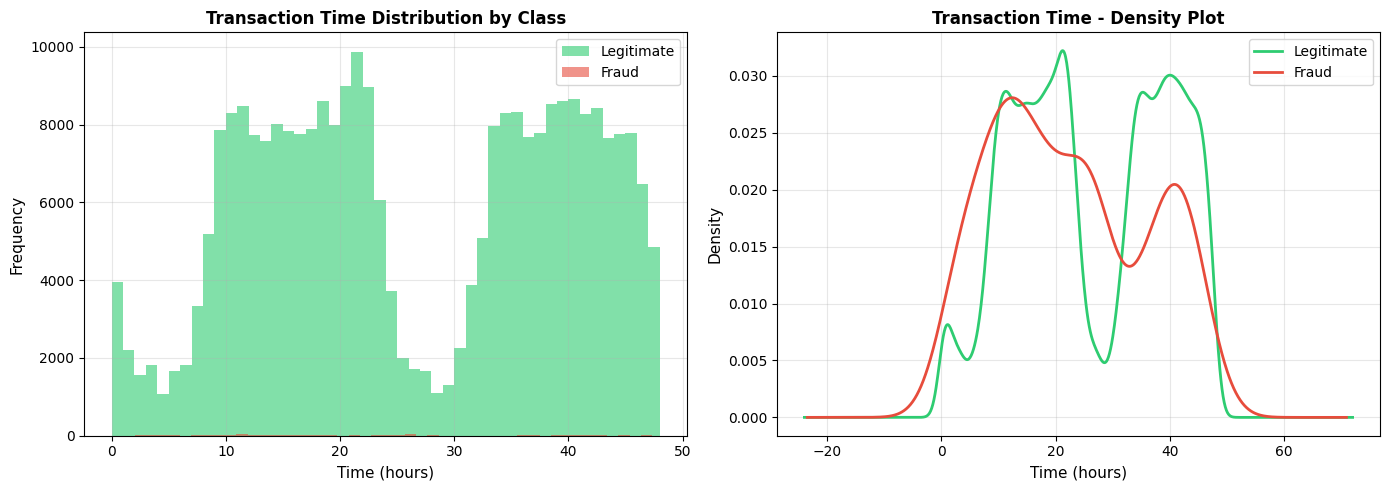

Saved: time_distribution.png


In [14]:
# Time Distribution by Class
# Convert seconds to hours
df['Time_hours'] = df['Time'] / 3600

# Time distribution by class
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Histogram
axes[0].hist(df[df['Class'] == 0]['Time_hours'], bins=48, alpha=0.6, label='Legitimate', color='#2ecc71')
axes[0].hist(df[df['Class'] == 1]['Time_hours'], bins=48, alpha=0.6, label='Fraud', color='#e74c3c')
axes[0].set_xlabel('Time (hours)', fontsize=11)
axes[0].set_ylabel('Frequency', fontsize=11)
axes[0].set_title('Transaction Time Distribution by Class', fontsize=12, fontweight='bold')
axes[0].legend()
axes[0].grid(alpha=0.3)

# KDE plot
df[df['Class'] == 0]['Time_hours'].plot(kind='kde', ax=axes[1], label='Legitimate', color='#2ecc71', linewidth=2)
df[df['Class'] == 1]['Time_hours'].plot(kind='kde', ax=axes[1], label='Fraud', color='#e74c3c', linewidth=2)
axes[1].set_xlabel('Time (hours)', fontsize=11)
axes[1].set_ylabel('Density', fontsize=11)
axes[1].set_title('Transaction Time - Density Plot', fontsize=12, fontweight='bold')
axes[1].legend()
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.savefig(figures_dir / 'time_distribution.png', dpi=300, bbox_inches='tight')
plt.show()
print("Saved: time_distribution.png")

In [15]:
# Compute correlations with Class
correlations = df.corr()['Class'].sort_values(ascending=False)

print("\nTop 10 Features Most Correlated with Fraud:")
print(correlations.head(11))  # Include Class itself

print("\nTop 10 Features Most Anti-Correlated with Fraud:")
print(correlations.tail(10))


Top 10 Features Most Correlated with Fraud:
Class     1.000000
V11       0.154876
V4        0.133447
V2        0.091289
V21       0.040413
V19       0.034783
V20       0.020090
V8        0.019875
V27       0.017580
V28       0.009536
Amount    0.005632
Name: Class, dtype: float64

Top 10 Features Most Anti-Correlated with Fraud:
V9    -0.097733
V1    -0.101347
V18   -0.111485
V7    -0.187257
V3    -0.192961
V16   -0.196539
V10   -0.216883
V12   -0.260593
V14   -0.302544
V17   -0.326481
Name: Class, dtype: float64


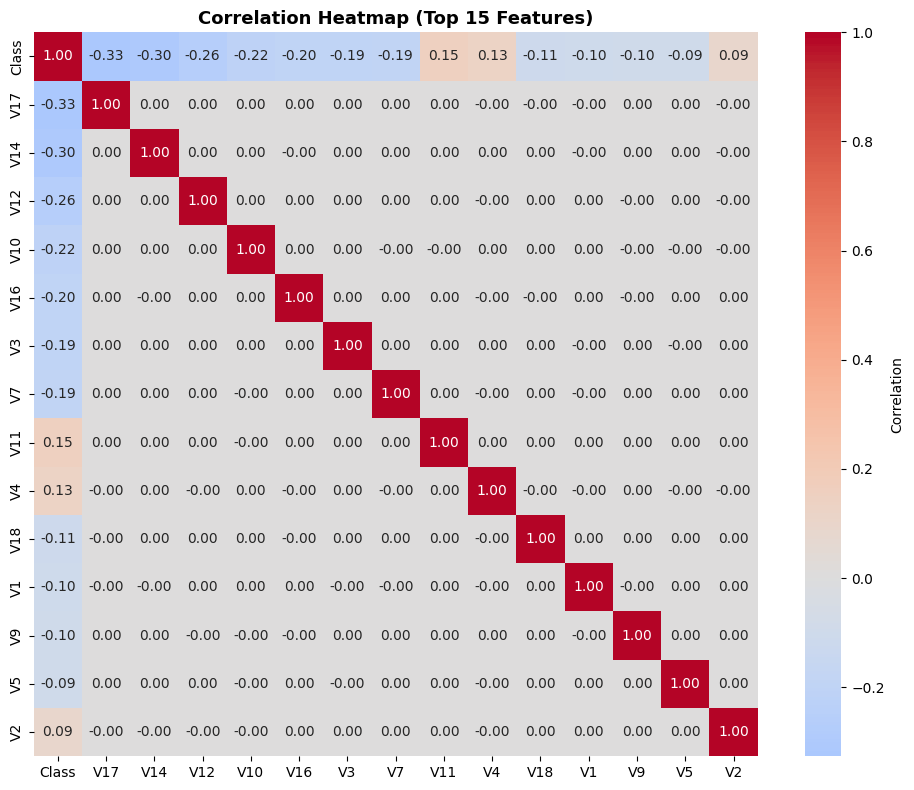

Saved: correlation_heatmap.png


In [16]:
# Correlation heatmap (top correlated features)
top_corr_features = correlations.abs().sort_values(ascending=False).head(15).index.tolist()

fig, ax = plt.subplots(figsize=(10, 8))
corr_matrix = df[top_corr_features].corr()
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0, 
            square=True, ax=ax, cbar_kws={'label': 'Correlation'})
ax.set_title('Correlation Heatmap (Top 15 Features)', fontsize=13, fontweight='bold')
plt.tight_layout()
plt.savefig(figures_dir / 'correlation_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()
print("Saved: correlation_heatmap.png")

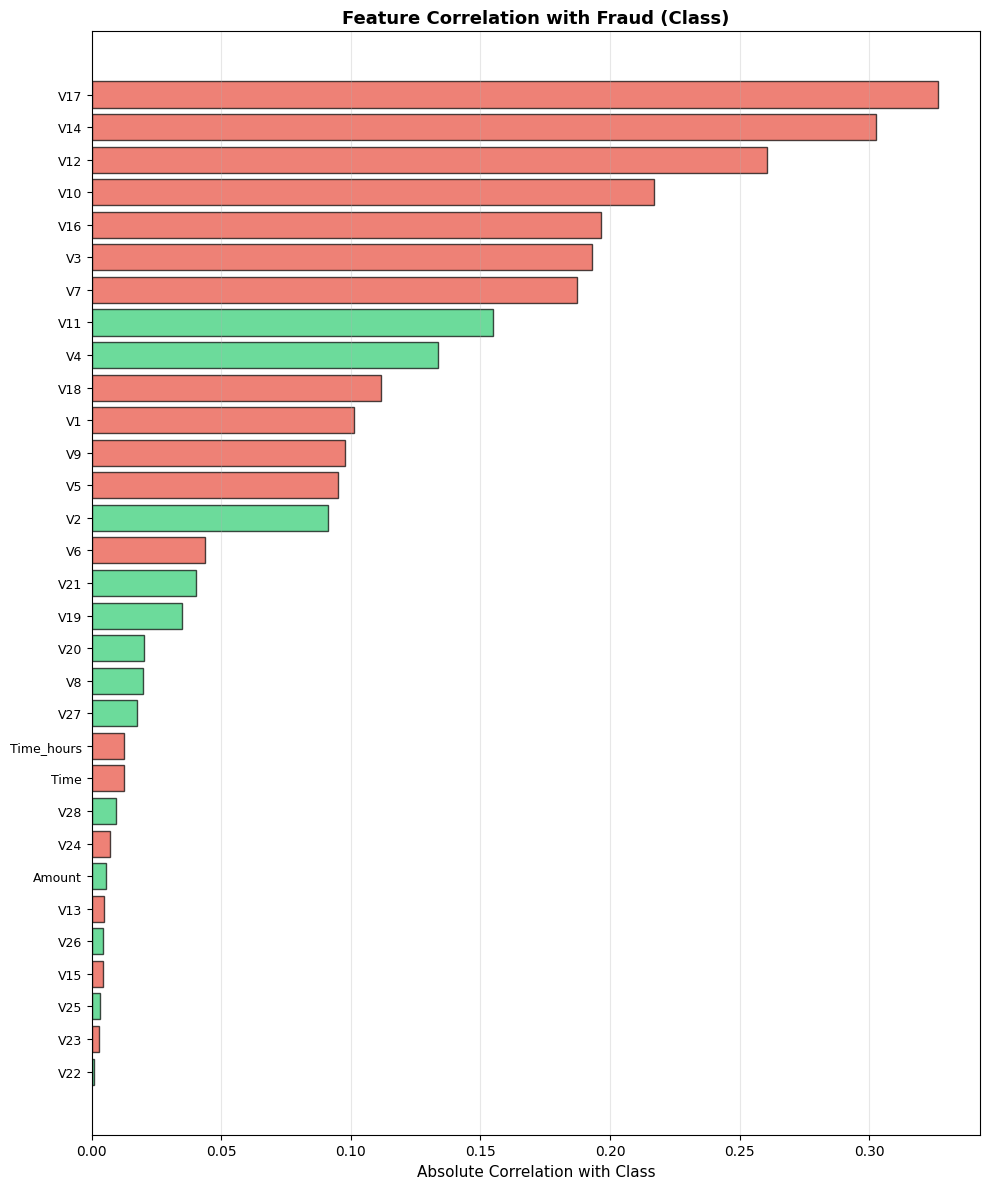

Saved: feature_correlations.png


In [17]:
# Feature correlations with Class (barplot)
fig, ax = plt.subplots(figsize=(10, 12))

# Get all correlations except Class itself
feature_corr = correlations.drop('Class').abs().sort_values(ascending=True)

# Color by correlation strength and direction
colors = ['#e74c3c' if correlations[feat] < 0 else '#2ecc71' for feat in feature_corr.index]

ax.barh(range(len(feature_corr)), feature_corr.values, color=colors, alpha=0.7, edgecolor='black')
ax.set_yticks(range(len(feature_corr)))
ax.set_yticklabels(feature_corr.index, fontsize=9)
ax.set_xlabel('Absolute Correlation with Class', fontsize=11)
ax.set_title('Feature Correlation with Fraud (Class)', fontsize=13, fontweight='bold')
ax.grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.savefig(figures_dir / 'feature_correlations.png', dpi=300, bbox_inches='tight')
plt.show()
print("Saved: feature_correlations.png")

In [18]:
df = df.drop('Time_hours', axis=1)

## 6. Summary of Key Findings

### Class Imbalance
- **Severe imbalance**: Only 0.17% of transactions are fraudulent (492 fraud vs 284,315 legitimate)
- **Imbalance ratio**: ~580:1 (legitimate:fraud)
- **Impact**: Standard accuracy is misleading; we need precision, recall, F1, and ROC-AUC metrics

### Data Quality
- **No missing values** - dataset is clean
- **31 features total**: V1-V28 (PCA-transformed), Time, Amount, Class
- **Time span**: Data covers ~2 days (48 hours) of transactions

### Feature Patterns
- **Amount**: Fraudulent transactions tend to have different distributions than legitimate ones
  - Legitimate: mean ≈ $88, higher variance
  - Fraud: mean ≈ $122-150, different distribution pattern
- **Time**: Frauds appear distributed across all hours, no strong time-of-day pattern
- **PCA Features**: Some features show moderate correlation with fraud (V4, V12, V14, etc.)

### Modeling Implications
1. **Must address class imbalance** via:
   - Class weights (penalize minority class errors)
   - SMOTE (oversample minority class)
   - Combined resampling strategies

2. **Evaluation strategy**:
   - Use **Precision, Recall, F1-Score** as primary metrics
   - Use **ROC-AUC** and **PR-AUC** for threshold-independent assessment
   - Consider business cost of false positives vs false negatives

3. **Feature engineering**:
   - Amount could benefit from scaling/transformation
   - Consider interaction features between Amount and certain PCA features
   - PCA features are already preprocessed; limited transformation needed